In [14]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [16]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [17]:
df = data[data["Visit"] == 1]
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [18]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [19]:
df['SES']= df['SES'].fillna(data['SES'].mean())
    

<ipython-input-19-de35f1517ac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES']= df['SES'].fillna(data['SES'].mean())


In [20]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [21]:
df=df.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Visit', 'Hand'], axis=1) 
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
5,Nondemented,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,Nondemented,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,Demented,M,71,16,2.460452,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...
359,Demented,M,73,12,2.460452,23.0,0.5,1661,0.698,1.056
361,Nondemented,F,66,13,2.000000,30.0,0.0,1495,0.746,1.174
365,Demented,F,72,16,3.000000,24.0,0.5,1354,0.733,1.296
367,Demented,M,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [22]:
clean = df.copy()
data_binary_encoded = pd.get_dummies(clean, columns=["M/F"])
data_binary_encoded.head()


,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [23]:
data_binary_encoded=data_binary_encoded.rename(columns={'M/F_M':'Male','M/F_F':'Female'})
data_binary_encoded

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1
...,...,...,...,...,...,...,...,...,...,...,...
359,Demented,73,12,2.460452,23.0,0.5,1661,0.698,1.056,0,1
361,Nondemented,66,13,2.000000,30.0,0.0,1495,0.746,1.174,1,0
365,Demented,72,16,3.000000,24.0,0.5,1354,0.733,1.296,1,0
367,Demented,80,16,1.000000,28.0,0.5,1704,0.711,1.030,0,1


In [24]:
# Assign X (data) and y (target = DEMENTED/NOT)

X = data_binary_encoded.drop("Group", axis=1)
y = data_binary_encoded["Group"]
print(X.shape, y.shape)

(150, 10) (150,)


In [25]:
# Split our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [27]:
# Fit (train) or model using the training data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [28]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9107142857142857
Testing Data Score: 0.868421052631579


In [29]:
# Make predictions

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Demented' 'Demented']
First 10 Actual labels: ['Converted', 'Nondemented', 'Converted', 'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented', 'Converted', 'Demented', 'Demented']


In [30]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Nondemented,Converted
1,Nondemented,Nondemented
2,Nondemented,Converted
3,Nondemented,Nondemented
4,Nondemented,Nondemented
5,Nondemented,Nondemented
6,Demented,Nondemented
7,Nondemented,Converted
8,Demented,Demented
9,Demented,Demented


In [31]:
# SVM

target = data_binary_encoded["Group"]
target_names = ["Demented", "Nondemented", "Converted"]

In [32]:
data = data_binary_encoded.drop("Group", axis=1).reset_index(drop=True)
feature_names = data.columns
data.head()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
1,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
2,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
3,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
4,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [34]:
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Test Accuracy: 0.947


In [36]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         1
 Nondemented       1.00      0.93      0.96        14
   Converted       0.96      1.00      0.98        23

    accuracy                           0.95        38
   macro avg       0.65      0.64      0.65        38
weighted avg       0.95      0.95      0.95        38



In [37]:
from sklearn import tree

In [38]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8421052631578947

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

1.0
1.0


In [40]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.44683672652793927, 'CDR'),
 (0.16928284573927457, 'MMSE'),
 (0.08497322521434526, 'nWBV'),
 (0.07580802171101418, 'Age'),
 (0.06338950770936962, 'eTIV'),
 (0.058766897211569594, 'ASF'),
 (0.04166128504791039, 'EDUC'),
 (0.03751898169146594, 'SES'),
 (0.01148264957160953, 'Female'),
 (0.010279859575501765, 'Male')]

In [41]:
# OVERSAMPLING

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [42]:
# define dataset
# X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

In [43]:
# summarize class distribution
# print(Counter(y))

Counter({0: 9900, 1: 100})


In [66]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [67]:
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [68]:
# summarize class distribution
print(Counter(y_train_over))

Counter({'Converted': 50, 'Demented': 50, 'Nondemented': 49})


In [69]:
# PCA

# standardize data
from sklearn.preprocessing import StandardScaler 
X_train_std = StandardScaler().fit_transform(X_train_over)
X_train_std

array([[ 1.8842905 , -0.57901585,  0.49013075, ...,  2.48772019,
         0.82107083, -0.82107083],
       [ 1.33780041,  1.16036645, -1.24214187, ...,  1.45911163,
         0.82107083, -0.82107083],
       [ 0.38144275, -0.92689231,  0.49013075, ..., -0.07220036,
         0.82107083, -0.82107083],
       ...,
       [ 1.20117789,  0.46461353, -0.37600556, ...,  0.39183358,
        -1.21792173,  1.21792173],
       [ 0.6546878 ,  1.85611937, -1.24214187, ..., -0.72184787,
        -1.21792173,  1.21792173],
       [-1.121405  , -0.23113939,  1.35626706, ..., -0.27328173,
         0.82107083, -0.82107083]])

In [70]:
X_test_std = StandardScaler().fit_transform(X_test)
X_test_std

array([[ 0.02061576,  1.32424438, -1.49969018,  0.33161067, -0.7028635 ,
        -0.07414645,  0.09634796, -0.03813218,  0.80757285, -0.80757285],
       [-1.80731471,  0.49248758,  0.57260898,  0.72539834, -0.7028635 ,
        -0.82427746,  1.52448442,  0.80347191,  0.80757285, -0.80757285],
       [ 1.71797977,  1.32424438,  0.57260898, -0.062177  , -0.7028635 ,
        -1.42194281, -0.94229673,  1.58652962,  0.80757285, -0.80757285],
       [-0.10995071,  0.49248758, -0.4635406 ,  0.72539834, -0.7028635 ,
         0.9931131 , -0.4489405 , -1.01146559, -1.23827837,  1.23827837],
       [-1.80731471,  0.49248758, -1.49969018,  0.72539834, -0.7028635 ,
         0.39544775,  0.64163643, -0.49186655,  0.80757285, -0.80757285],
       [-0.50165009,  1.32424438, -0.4635406 ,  0.72539834, -0.7028635 ,
        -0.47055715,  0.58970419,  0.38632901,  0.80757285, -0.80757285],
       [-1.1544824 ,  0.49248758, -1.49969018, -3.60626602,  2.43934978,
         1.50539769, -0.91633062, -1.3993353 

In [71]:
# use of Python library to directly compute Principal Components

from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

In [72]:
principalComponents = pca.fit_transform(X_train_std) 
principalDf_X_train = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf_X_train.head(5)

,principal component 1,principal component 2
0,-2.909597,0.232092
1,-0.944389,-0.642740
2,-1.079719,-0.132745
3,2.625434,-0.735325
4,4.163521,-0.227596


In [73]:
principalComponents = pca.fit_transform(X_test_std) 
principalDf_X_test = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf_X_test.head(5)

,principal component 1,principal component 2
0,-1.849971,-0.685196
1,-2.193787,0.217307
2,-1.739394,1.013420
3,1.162326,-1.736954
4,-1.702774,-1.120831


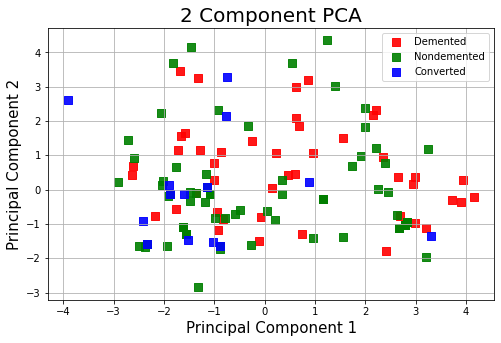

In [106]:
# visualize 2D Projection

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Demented', 'Nondemented', 'Converted'] 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets,colors): 
    indicesToKeep = finalDf_X_train['Group'] == target
    ax.scatter(finalDf_X_train.loc[indicesToKeep, 'principal component 1'] , finalDf_X_train.loc[indicesToKeep, 'principal component 2'] , marker='s', c = color , s = 50, alpha=.9) 
ax.legend(targets) 
ax.grid()

In [109]:
# LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [110]:
# Fit (train) or model using the training data

classifier.fit(principalDf_X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [149, 112]